In [1]:
from deep_dream import DeepDreamer
import IPython.display as display
import librosa.display
from librosa.feature import melspectrogram
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import Tensor
from typing import List
from utils.displays import display_audio_player, display_image
from utils.converters import open_image_as_np_array
import utils.constants as consts

PATH_TO_AUDIO: str = '../audio-files'
PATH_TO_IMAGES: str = '../images'

##### Load audio

In [2]:
sample, _ = librosa.load(f'{PATH_TO_AUDIO}/violin.wav', mono=True)  # type: np.ndarray, int
display_audio_player(sample)

##### Encode audio into a mel spectrogram.

In [3]:
encoded_sample: np.ndarray = melspectrogram(
    sample,
    sr=consts.SAMPLE_RATE,
    n_fft=consts.NUM_FFT,
    hop_length=consts.MEL_HOP_LEN,
    n_mels=consts.NUM_MELS
)

###### Load image back in for DeepDreamification

In [4]:
# Downsizing the image makes it easier to work with.
original_img: np.array = open_image_as_np_array(f'{PATH_TO_IMAGES}/mazzy.png', max_dim=600)
base_shape: Tensor = tf.shape(original_img)[:-1]  # Original size of image shape, used to resize final deepdream.

##### DreamDream image

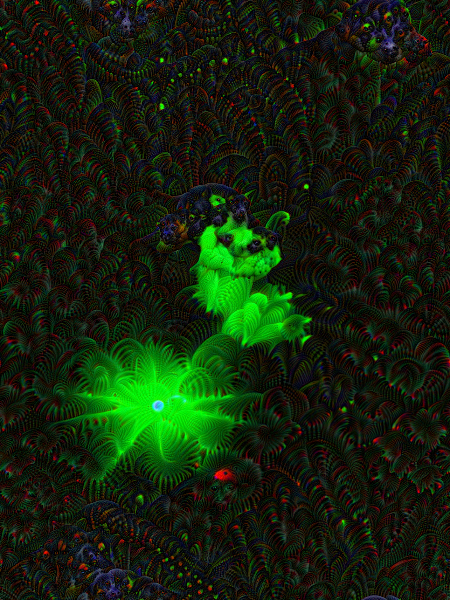

In [7]:
# Maximize the activations of these layers.
layer_names: List[str] = [
    'mixed5',
    'mixed0'
]

deep_dreamer = DeepDreamer(layer_names)

# Change settings below to achieve different results.
image: Tensor = deep_dreamer.dreamify(
    _img=original_img,
    steps_per_octave=50,
    step_size=0.01,
    octaves=range(-2, 5),
    octave_scale=1.3,
)

# Clear anything that might have been draw such as warnings.
display.clear_output(wait=True)

image = tf.image.resize(image, base_shape)  # Resize image to original image size.
image = tf.image.convert_image_dtype(image / 255.0, dtype=tf.uint8)

display_image(image)
